In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

In [3]:
train_targets = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/C/train_targets.parquet')
X_train_observed = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/C/X_train_observed.parquet')
X_train_estimated = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/C/X_train_estimated.parquet')

In [4]:
train_targets.shape, X_train_observed.shape, X_train_estimated.shape

((32155, 2), (116825, 46), (17576, 47))

In [5]:
train_targets.head()

,time,pv_measurement
0,2018-12-31 23:00:00,NaN
1,2019-01-01 00:00:00,NaN
2,2019-01-01 01:00:00,NaN
3,2019-01-01 02:00:00,NaN
4,2019-01-01 03:00:00,NaN


In [6]:
X_train_observed.head()

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-01-01 00:00:00,5.6,1.240,1153.599976,0.0,0.0,1153.599976,1.0,275.200012,0.0,0.0,0.0,0.0,63.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.299988,0.00,0.0,972.599976,978.599976,0.0,0.0,90.199997,984.700012,NaN,0.0,0.0,-0.0,0.0,12.989000,-49.178001,0.0,278.500000,68.500000,18220.400391,2.5,1.1,2.2,-0.0
1,2019-01-01 00:15:00,5.5,1.241,1137.900024,0.0,0.0,1137.900024,1.0,275.100006,0.0,0.0,0.0,0.0,74.900002,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,987.099976,0.06,1.0,972.299988,978.299988,0.2,0.0,90.000000,984.400024,NaN,0.0,0.0,-0.0,0.0,18.214001,-48.724998,0.0,278.399994,80.800003,17083.699219,2.8,1.1,2.5,-0.0
2,2019-01-01 00:30:00,5.4,1.241,1122.199951,0.0,0.0,1122.199951,1.0,274.899994,0.0,0.0,0.0,0.0,84.300003,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.799988,0.06,1.0,972.000000,978.000000,0.3,0.0,89.900002,984.099976,NaN,0.0,0.0,-0.0,0.1,23.351000,-48.127998,0.0,278.299988,89.900002,15940.900391,3.0,1.1,2.8,-0.0
3,2019-01-01 00:45:00,5.4,1.241,1106.400024,0.0,0.0,1106.400024,1.0,274.700012,0.0,0.0,0.0,0.0,92.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.599976,0.06,1.0,971.700012,977.799988,0.3,0.0,89.699997,983.799988,NaN,0.0,0.0,-0.0,0.1,28.382000,-47.393002,0.0,278.200012,96.099998,14792.000000,3.3,1.2,3.0,-0.0
4,2019-01-01 01:00:00,5.3,1.241,1090.599976,0.0,0.0,1090.599976,1.0,274.500000,0.0,0.0,0.0,0.0,98.000000,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,986.400024,0.06,1.0,971.400024,977.500000,0.4,0.0,89.599998,983.599976,NaN,0.0,0.0,-0.0,0.1,33.292999,-46.529999,0.0,278.100006,99.400002,13637.299805,3.5,1.2,3.3,-0.0


In [7]:
# includes an additional index called 'date_calc'
X_train_estimated.head()

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.3,1.231,1427.400024,0.0,0.0,1215.800049,1.0,281.200012,0.0,0.0,0.0,0.0,100.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.0,0.0,986.000000,992.000000,0.0,0.0,93.900002,998.099976,NaN,0.0,0.0,-0.0,0.4,340.785004,-38.502998,0.0,285.200012,100.0,34387.398438,1.2,-0.3,1.1,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.3,1.231,2089.000000,0.0,0.0,1425.900024,1.0,281.200012,0.0,0.0,0.0,0.0,100.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.700012,0.0,0.0,985.700012,991.700012,0.0,0.0,93.599998,997.700012,NaN,0.0,0.0,-0.0,0.5,345.440002,-38.992001,0.0,285.100006,100.0,27418.500000,1.2,-0.2,1.2,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.231,2750.500000,0.0,0.0,1636.099976,1.0,281.100006,0.0,0.0,0.0,0.0,100.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.400024,0.0,0.0,985.400024,991.400024,0.0,0.1,93.300003,997.400024,NaN,0.0,0.0,-0.0,0.5,350.144012,-39.348000,0.0,285.100006,100.0,20508.800781,1.2,-0.1,1.2,-0.0
3,2022-10-27 07:00:18,2022-10-28 22:45:00,8.2,1.230,3412.100098,0.0,0.0,1846.199951,1.0,281.100006,0.0,0.0,0.0,0.0,100.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.099976,0.0,0.0,985.099976,991.099976,0.0,0.1,93.000000,997.099976,NaN,0.0,0.0,-0.0,0.5,354.880005,-39.567001,0.0,285.000000,100.0,13657.799805,1.2,-0.0,1.2,-0.0
4,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.230,4073.699951,0.0,0.0,2056.399902,1.0,281.100006,0.0,0.0,0.0,0.0,100.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.700012,0.0,0.0,984.700012,990.700012,0.0,0.1,92.699997,996.799988,NaN,0.0,0.0,-0.0,0.6,359.634003,-39.647999,0.0,285.000000,100.0,6865.000000,1.2,0.1,1.2,-0.0


In [8]:
train_targets.dtypes

time              datetime64[ns]
pv_measurement           float64
dtype: object

In [9]:
X_train_estimated.dtypes

date_calc                         datetime64[ns]
date_forecast                     datetime64[ns]
absolute_humidity_2m:gm3                 float32
air_density_2m:kgm3                      float32
ceiling_height_agl:m                     float32
clear_sky_energy_1h:J                    float32
clear_sky_rad:W                          float32
cloud_base_agl:m                         float32
dew_or_rime:idx                          float32
dew_point_2m:K                           float32
diffuse_rad:W                            float32
diffuse_rad_1h:J                         float32
direct_rad:W                             float32
direct_rad_1h:J                          float32
effective_cloud_cover:p                  float32
elevation:m                              float32
fresh_snow_12h:cm                        float32
fresh_snow_1h:cm                         float32
fresh_snow_24h:cm                        float32
fresh_snow_3h:cm                         float32
fresh_snow_6h:cm    

In [10]:
X_train_observed.dtypes

date_forecast                     datetime64[ns]
absolute_humidity_2m:gm3                 float32
air_density_2m:kgm3                      float32
ceiling_height_agl:m                     float32
clear_sky_energy_1h:J                    float32
clear_sky_rad:W                          float32
cloud_base_agl:m                         float32
dew_or_rime:idx                          float32
dew_point_2m:K                           float32
diffuse_rad:W                            float32
diffuse_rad_1h:J                         float32
direct_rad:W                             float32
direct_rad_1h:J                          float32
effective_cloud_cover:p                  float32
elevation:m                              float32
fresh_snow_12h:cm                        float32
fresh_snow_1h:cm                         float32
fresh_snow_24h:cm                        float32
fresh_snow_3h:cm                         float32
fresh_snow_6h:cm                         float32
is_day:idx          

In [11]:
X_train_estimated.describe()

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,17576,17576,17576.000000,17576.000000,12980.000000,1.757600e+04,17576.000000,14772.000000,17576.000000,17576.000000,17576.000000,1.757600e+04,17576.000000,1.757600e+04,17576.000000,17576.0,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,3678.0,17576.000000,17576.0,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.000000,17576.00000,17576.000000,17576.000000,17576.000000
mean,2023-01-27 19:07:13.160673536,2023-01-28 23:11:50.127446528,3.927350,1.281578,3403.212646,2.376466e+05,66.013062,1738.442749,-0.093707,269.505615,23.372576,8.414221e+04,25.439896,9.158342e+04,67.135956,24.0,0.601502,0.049681,1.158028,0.148942,0.298333,0.349454,0.740669,1009.395630,0.004569,0.090066,993.689453,999.935730,3.535383,0.002970,72.576851,1006.210083,250.0,0.812307,0.0,0.001245,0.075586,179.674271,-10.690556,0.033546,274.769897,72.695808,34643.558594,2.91720,0.150148,1.320397,-0.000762
min,2022-10-27 07:00:18,2022-10-28 22:00:00,0.800000,1.207000,27.600000,0.000000e+00,0.000000,27.299999,-1.000000,251.899994,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,970.599976,0.000000,0.000000,955.700012,961.599976,0.000000,0.000000,21.100000,967.599976,250.0,0.000000,0.0,-0.000000,0.000000,0.009000,-50.042000,0.000000,259.500000,0.000000,160.199997,0.00000,-6.400000,-5.000000,-0.100000
25%,2022-12-12 08:00:05,2022-12-13 16:26:15,2.800000,1.261000,1266.375000,0.000000e+00,0.000000,515.275024,0.000000,265.899994,0.000000,0.000000e+00,0.000000,0.000000e+00,37.875001,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,999.099976,0.000000,0.000000,983.500000,989.774994,0.000000,0.000000,62.599998,996.000000,250.0,0.000000,0.0,-0.000000,0.000000,94.672752,-28.220250,0.000000,271.899994,46.375001,20512.024902,1.70000,-1.500000,0.300000,0.000000
50%,2023-01-28 08:00:04,2023-01-29 10:52:30,3.800000,1.278000,2871.149902,0.000000e+00,0.000000,989.049988,0.000000,269.899994,0.000000,0.000000e+00,0.000000,0.000000e+00,84.599998,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1009.599976,0.000000,0.000000,993.799988,1000.099976,0.000000,0.000000,74.500000,1006.400024,250.0,0.000000,0.0,-0.000000,0.000000,179.507996,-9.919500,0.000000,274.700012,97.400002,36348.650391,2.60000,-0.100000,1.300000,0.000000
75%,2023-03-15 08:00:04,2023-03-16 05:18:45,4.900000,1.301000,4948.549805,1.388008e+05,37.799999,2067.024902,0.000000,273.600006,23.299999,8.177455e+04,0.000000,2.711800e+03,99.900002,24.0,0.000000,0.000000,0.800000,0.000000,0.000000,1.000000,1.000000,1019.400024,0.000000,0.000000,1003.599976,1009.900024,0.000000,0.000000,83.699997,1016.299988,250.0,0.000000,0.0,0.000000,0.100000,264.561249,4.516000,0.000000,277.899994,100.000000,49470.349609,3.90000,1.200000,2.400000,0.000000
max,2023-04-29 07:00:05,2023-04-30 23:45:00,8.900000,1.384000,12115.400391,2.558352e+06,712.299988,10725.599609,1.000000,282.399994,319.000000,1.111721e+06,531.400024,1.897313e+06

In [12]:
X_train_observed.describe()

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,116825,116825.000000,116825.000000,96902.000000,1.168250e+05,116825.000000,108313.000000,116825.000000,116825.000000,116825.000000,1.168250e+05,116825.000000,1.168250e+05,116825.000000,116825.0,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,9232.0,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000,116825.000000
mean,2020-08-31 11:00:00.000000512,6.013866,1.253214,2605.747559,5.423583e+05,150.655075,1710.178467,-0.013867,275.147400,40.920612,1.473144e+05,52.393135,1.886154e+05,66.632774,24.0,0.186821,0.015556,0.373644,0.046708,0.093405,0.495219,0.583403,1009.408325,0.005616,0.084049,993.936462,1000.055786,2.129328,0.009322,73.668045,1006.202332,250.0,0.560316,0.000026,0.000657,0.089608,179.576492,-0.334226,0.062269,279.682556,73.351135,33186.710938,2.855492,0.739988,0.838296,0.000211
min,2019-01-01 00:00:00,0.500000,1.139000,27.799999,0.000000e+00,0.000000,27.900000,-1.000000,247.300003,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,944.299988,0.000000,0.000000,929.799988,935.599976,0.000000,0.000000,18.700001,941.400024,250.0,0.000000,0.000000,-0.000000,0.000000,0.003000,-50.042000,0.000000,257.899994,0.000000,130.600006,0.000000,-6.300000,-8.800000,-0.100000
25%,2019-11-01 05:30:00,4.000000,1.228000,981.400024,0.000000e+00,0.000000,618.500000,0.000000,270.600006,0.000000,0.000000e+00,0.000000,0.000000e+00,40.799999,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.500000,0.000000,0.000000,986.200012,992.200012,0.000000,0.000000,63.900002,998.400024,250.0,0.000000,0.000000,0.000000,0.000000,89.529999,-17.424999,0.000000,275.000000,52.599998,16388.000000,1.600000,-0.900000,-0.500000,0.000000
50%,2020-08-31 11:00:00,5.400000,1.253000,1643.000000,1.267980e+04,0.000000,1178.400024,0.000000,274.899994,0.000000,1.394200e+04,0.000000,0.000000e+00,80.199997,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1010.299988,0.000000,0.000000,994.799988,1000.900024,0.000000,0.000000,76.000000,1007.000000,250.0,0.000000,0.000000,0.000000,0.000000,179.462997,-0.288000,0.000000,278.899994,93.300003,37765.199219,2.500000,0.400000,0.900000,0.000000
75%,2021-07-01 16:30:00,7.900000,1.277000,3406.175049,8.698632e+05,242.000000,2056.399902,0.000000,280.600006,68.900002,2.478511e+05,33.400002,1.257561e+05,98.699997,24.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1018.299988,0.000000,0.000000,1002.799988,1008.900024,0.000000,0.000000,85.699997,1015.099976,250.0,0.000000,0.000000,0.000000,0.100000,269.747009,16.603001,0.100000,284.299988,99.900002,48576.000000,3.800000,2.300000,2.000000,0.000000
max,2022-05-01 22:00:00,18.900000,1.441000,12431.299805,3.007722e+06,837.000000,11665.700195,1.000000,295.100006,344.500000,1.217465e+06,689.799988,2.446962e+06,100.000000,24.0,37.599998,7.700000,37.599998,20.799999,34.099998,1

In [13]:
feature_names_observed = [
    "is_in_shadow:idx",
    "is_day:idx",
    "sun_elevation:d",
    "diffuse_rad_1h:J",
    "diffuse_rad:W",
    "clear_sky_energy_1h:J",
    "clear_sky_rad:W",
    "direct_rad_1h:J",
    "direct_rad:W"
]

X_train_observed = X_train_observed[feature_names_observed].copy()
X_train_observed.describe()

,is_in_shadow:idx,is_day:idx,sun_elevation:d,diffuse_rad_1h:J,diffuse_rad:W,clear_sky_energy_1h:J,clear_sky_rad:W,direct_rad_1h:J,direct_rad:W
count,116825.000000,116825.000000,116825.000000,1.168250e+05,116825.000000,1.168250e+05,116825.000000,1.168250e+05,116825.000000
mean,0.583403,0.495219,-0.334226,1.473144e+05,40.920612,5.423583e+05,150.655075,1.886154e+05,52.393135
std,0.493070,0.500001,24.077776,2.192342e+05,61.683189,8.401478e+05,234.032013,4.116657e+05,115.906731
min,0.000000,0.000000,-50.042000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,-17.424999,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,1.000000,0.000000,-0.288000,1.394200e+04,0.000000,1.267980e+04,0.000000,0.000000e+00,0.000000
75%,1.000000,1.000000,16.603001,2.478511e+05,68.900002,8.698632e+05,242.000000,1.257561e+05,33.400002
max,1.000000,1.000000,50.036999,1.217465e+06,344.500000,3.007722e+06,837.000000,2.446962e+06,689.799988


In [14]:
feature_names_estimated = [
    "is_in_shadow:idx",
    "sun_elevation:d",
    "diffuse_rad:W",
    "diffuse_rad_1h:J",
    "clear_sky_rad:W",
    "direct_rad:W",
    "clear_sky_energy_1h:J",
    "direct_rad_1h:J"
]

X_train_estimated = X_train_estimated[feature_names_estimated].copy()
X_train_estimated.describe()

,is_in_shadow:idx,sun_elevation:d,diffuse_rad:W,diffuse_rad_1h:J,clear_sky_rad:W,direct_rad:W,clear_sky_energy_1h:J,direct_rad_1h:J
count,17576.000000,17576.000000,17576.000000,1.757600e+04,17576.000000,17576.000000,1.757600e+04,1.757600e+04
mean,0.740669,-10.690556,23.372576,8.414221e+04,66.013062,25.439896,2.376466e+05,9.158342e+04
std,0.438267,21.710526,46.999931,1.669390e+05,144.346573,79.145538,5.180027e+05,2.812954e+05
min,0.000000,-50.042000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,-28.220250,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,1.000000,-9.919500,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
75%,1.000000,4.516000,23.299999,8.177455e+04,37.799999,0.000000,1.388008e+05,2.711800e+03
max,1.000000,41.234001,319.000000,1.111721e+06,712.299988,531.400024,2.558352e+06,1.897313e+06


In [15]:
train_targets.isna().sum()

time                 0
pv_measurement    6060
dtype: int64

In [16]:
nan_indices = np.where(train_targets['pv_measurement'].isna())[0]

for idx in nan_indices:
    # Find closest non-NaN value before the current index
    prev_idx = idx - 1
    while prev_idx >= 0 and np.isnan(train_targets.at[prev_idx, 'pv_measurement']):
        prev_idx -= 1
    
    # Find closest non-NaN value after the current index
    next_idx = idx + 1
    while next_idx < len(train_targets['pv_measurement']) and np.isnan(train_targets.at[next_idx, 'pv_measurement']):
        next_idx += 1
    
    # Check if non-NaN neighbors are found
    if prev_idx >= 0 and next_idx < len(train_targets['pv_measurement']):
        prev_value = train_targets.at[prev_idx, 'pv_measurement']
        next_value = train_targets.at[next_idx, 'pv_measurement']
        
        # Calculate the mean of the closest non-NaN values
        mean_value = (prev_value + next_value) / 2
        
        # Replace NaN with the mean value
        train_targets.at[idx, 'pv_measurement'] = mean_value

train_targets.isna().sum()

time                 0
pv_measurement    5913
dtype: int64

In [17]:
zero_pv_values = train_targets[train_targets['pv_measurement'] == 0]
count_zero_pv = len(zero_pv_values)
print(f'Number of zero pv values: {count_zero_pv}')

Number of zero pv values: 16099


In [18]:
consecutive_zero_groups = []
zero_indices = train_targets[train_targets['pv_measurement'] == 0].index

start = zero_indices[0]
for i in range(1, len(zero_indices)):
    if zero_indices[i] != zero_indices[i-1] + 1:
        consecutive_zero_groups.append((start, zero_indices[i-1]))
        start = zero_indices[i]
consecutive_zero_groups.append((start, zero_indices[-1]))

print(consecutive_zero_groups)

[(5914, 5941), (5947, 5957), (5971, 5981), (5995, 6004), (6019, 6029), (6043, 6053), (6067, 6077), (6091, 6101), (6115, 6125), (6138, 6149), (6162, 6173), (6184, 6184), (6187, 6197), (6211, 6221), (6235, 6245), (6259, 6269), (6282, 6294), (6305, 6318), (6330, 6342), (6354, 6365), (6378, 6389), (6402, 6413), (6426, 6437), (6450, 6461), (6474, 6486), (6498, 6510), (6522, 6534), (6546, 6558), (6569, 6582), (6593, 6606), (6618, 6630), (6642, 6654), (6666, 6678), (6690, 6702), (6714, 6726), (6737, 6750), (6761, 6774), (6785, 6798), (6809, 6823), (6833, 6846), (6857, 6870), (6881, 6894), (6905, 6918), (6929, 6942), (6953, 6967), (6977, 6991), (7001, 7015), (7025, 7039), (7048, 7063), (7073, 7087), (7097, 7112), (7120, 7137), (7145, 7159), (7169, 7182), (7190, 7205), (7214, 7229), (7238, 7253), (7262, 7277), (7286, 7301), (7310, 7326), (7334, 7349), (7358, 7374), (7382, 7398), (7406, 7422), (7430, 7446), (7454, 7470), (7477, 7494), (7501, 7518), (7525, 7543), (7546, 7591), (7596, 7615), (7620

In [19]:
zero_time_values = train_targets.loc[zero_indices, 'time']
time_diffs = zero_time_values.diff().dropna()
print(time_diffs)

5915    0 days 01:00:00
5916    0 days 01:00:00
5917    0 days 01:00:00
5918    0 days 01:00:00
5919    0 days 01:00:00
              ...      
32133   0 days 01:00:00
32134   0 days 01:00:00
32152   0 days 18:00:00
32153   0 days 01:00:00
32154   0 days 01:00:00
Name: time, Length: 16098, dtype: timedelta64[ns]


In [20]:
train_targets['time'] = pd.to_datetime(train_targets['time'])
train_targets = train_targets.sort_values(by='time')
train_targets['time_diff'] = train_targets['time'].diff()
gaps = train_targets[train_targets['time_diff'] > pd.Timedelta(hours=1)]
print(gaps)

                     time  pv_measurement         time_diff
7177  2019-10-27 02:00:00            0.00   0 days 03:00:00
15911 2020-10-25 02:00:00            0.00   0 days 03:00:00
24813 2021-10-31 02:00:00            0.00   0 days 03:00:00
29201 2022-10-28 22:00:00           -0.00 180 days 01:00:00
30105 2023-01-08 12:00:00           10.78  33 days 23:00:00
30276 2023-01-18 11:00:00            1.96   2 days 21:00:00
30616 2023-02-04 10:00:00          250.88   2 days 20:00:00
30617 2023-02-07 11:00:00            0.98   3 days 01:00:00
30670 2023-02-12 09:00:00           15.68   2 days 18:00:00
30940 2023-02-26 10:00:00          250.88   2 days 20:00:00
31110 2023-03-18 08:00:00            7.84  12 days 21:00:00
31208 2023-03-22 13:00:00            8.82   0 days 04:00:00


In [21]:
correlation = 0.91
A = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/A/train_targets.parquet')
C = pd.read_parquet('/Users/petterdalhaug/Documents/GitHub/data_analysis/analysis/data/C/train_targets.parquet')

# Assuming both datasets are indexed by the 'time' column
A.set_index('time', inplace=True)
C.set_index('time', inplace=True)

# Resample or interpolate to ensure same time resolution
# Here's an example of resampling to 1-hour resolution, filling missing values with linear interpolation
A_resampled = A.resample('1H').interpolate()
C_resampled = C.resample('1H').interpolate()


In [22]:
gap_start = '2022-10-28 22:00:00'
gap_end = '2023-01-08 12:00:00'

A_gap_data = A_resampled.loc[gap_start:gap_end]


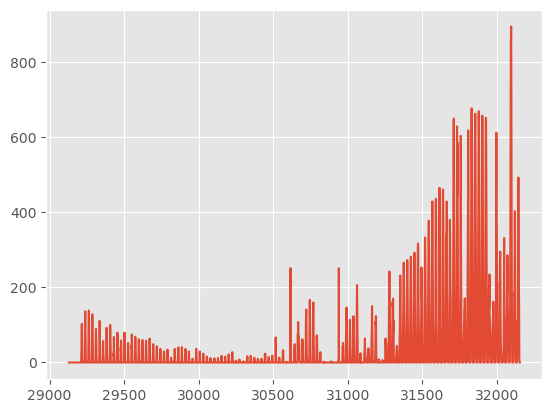

In [28]:
gap_start = '2022-04-28 22:00:00'
gap_end = '2023-08-08 12:00:00'

gap_data = train_targets[(train_targets['time'] >= gap_start) & (train_targets['time'] <= gap_end)]

gap_data['pv_measurement'].plot()
plt.show()